In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from function_creation import draw_chart,draw_chart2, print_label, calc_means, calc_sems, count_sample

In [2]:
#read, select, and rename the columns
df = pd.read_csv("employee_reviews.csv",encoding="utf-8")
df=df[['Unnamed: 0','company', 'location','dates','job-title','overall-ratings','work-balance-stars','culture-values-stars','carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars']]
df=df.rename(columns={'Unnamed: 0':'0','job-title':'title','overall-ratings':'overall', 'work-balance-stars':'wk_bal','culture-values-stars':'culture_val','carrer-opportunities-stars':'career_opp','comp-benefit-stars':'comp_benefit', 'senior-mangemnet-stars':'Sr_mgmt'})
df.head()

,0,company,location,dates,title,overall,wk_bal,culture_val,career_opp,comp_benefit,Sr_mgmt
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0


####   <'dates' column> 
#####    i)  clean, split, and keep only the 'year' of 'dates' column
#####    ii) clean the non-valid data of the 'year' column-- dropped :  '0000's & 'None', total (67526)

In [3]:
# clean, split, and keep only the year of 'dates' column
df['overall'].value_counts()
df['dates'].dropna(inplace = True) 
df[['date','year']]=df['dates'].str.split( ", ", expand=True)
df1=df.drop(['dates','date'], axis=1)

df1=df1[df1['year'] != '0000'] 
df1=df1[df1['year'] !=  None]  

#df1.head() 

#####   <'title' coulmn>  :total (67529)
#####  i) 'status': Current Emplyee (42540), Former Employee (24989)
#####  ii) "position' : Anonymous Emplyee (27002)

In [4]:
# split the 'title' column into 'status' and 'position' columns
# drop the 'title' column
a= df1['title'].str.split( " - ", expand=True)
df1['status']=a[0]
df1['position']=a[1]
df2=df1.drop(['title'], axis=1)
df2.head()

,0,company,location,overall,wk_bal,culture_val,career_opp,comp_benefit,Sr_mgmt,year,status,position
0,1,google,none,5.0,4.0,5.0,5.0,4.0,5.0,2018,Current Employee,Anonymous Employee
1,2,google,"Mountain View, CA",4.0,2.0,3.0,3.0,5.0,3.0,2013,Former Employee,Program Manager
2,3,google,"New York, NY",5.0,5.0,4.0,5.0,5.0,4.0,2014,Current Employee,Software Engineer III
3,4,google,"Mountain View, CA",5.0,2.0,5.0,5.0,4.0,5.0,2015,Current Employee,Anonymous Employee
4,5,google,"Los Angeles, CA",5.0,5.0,5.0,5.0,5.0,5.0,2018,Former Employee,Software Engineer


In [5]:
#  reorder the columns (dropped '0' column)
df2=df2[['0','company', 'location','year','status','position','overall',\
         'wk_bal','culture_val','career_opp','comp_benefit','Sr_mgmt']]
df2.to_csv("FANG_plus.csv", encoding="utf-8", index=False)# 'overall' column is the only float64
df2.head()

,0,company,location,year,status,position,overall,wk_bal,culture_val,career_opp,comp_benefit,Sr_mgmt
0,1,google,none,2018,Current Employee,Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,2,google,"Mountain View, CA",2013,Former Employee,Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
2,3,google,"New York, NY",2014,Current Employee,Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,4,google,"Mountain View, CA",2015,Current Employee,Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,5,google,"Los Angeles, CA",2018,Former Employee,Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0


##  Cleaned DF (Jordy)

In [6]:
df3=df2[['company', 'location','year','status','position','overall',\
        'wk_bal','culture_val','career_opp','comp_benefit','Sr_mgmt']]
df3.head()
df3.dtypes
df3["wk_bal"] = pd.to_numeric(df["wk_bal"], errors = "coerce")
df3["overall"] = pd.to_numeric(df["overall"], errors = "coerce")
df3["culture_val"] = pd.to_numeric(df["culture_val"], errors = "coerce")
df3["career_opp"] = pd.to_numeric(df["career_opp"], errors = "coerce")
df3["comp_benefit"] = pd.to_numeric(df["comp_benefit"], errors = "coerce")
df3["Sr_mgmt"] = pd.to_numeric(df["Sr_mgmt"], errors = "coerce")
df3 = df3.dropna(how = "any")
df3.count()
df3.head(100)

C:\Users\ece.sohn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ece.sohn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ece.sohn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,company,location,year,status,position,overall,wk_bal,culture_val,career_opp,comp_benefit,Sr_mgmt
0,google,none,2018,Current Employee,Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,google,"Mountain View, CA",2013,Former Employee,Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
2,google,"New York, NY",2014,Current Employee,Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,google,"Mountain View, CA",2015,Current Employee,Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,google,"Los Angeles, CA",2018,Former Employee,Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0
5,google,"Mountain View, CA",2018,Former Employee,SDE2,5.0,4.0,4.0,4.0,5.0,4.0
6,google,"New York, NY",2018,Current Employee,Software Engineer,5.0,5.0,4.0,4.0,5.0,4.0
7,google,none,2018,Former Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0
8,google,"New York, NY",2018,Current Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0
9,google,none,2018,Current Employee,Anonymous Employee,5.0,5.0,5.0,5.0,5.0,5.0


##  a) work_balance_ratings

#####  final sample size (60366) after removal of 'none' (7160) 

In [7]:
df_a=df2[df2['wk_bal'] !='none'] #7160 counts of 'none'
df_a["wk_bal"] = pd.to_numeric(df_a['wk_bal'], errors='coerce')# do not fill the NaN  with 0's

#df_a['wk_bal'].dtype
#df_a.dtypes
#df_a["wk_bal"].unique()


C:\Users\ece.sohn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# count the sample by company
count_sample(df_a, 'wk_bal')

company,amazon,apple,facebook,google,microsoft,netflix
year,,,,,,
2008,220,326,7,191,571,50
2009,168,202,8,134,329,88
2010,168,238,33,164,474,53
2011,255,381,24,198,812,40
2012,521,467,203,324,1441,56
2013,762,783,75,376,1497,54
2014,1288,1253,129,651,1994,62
2015,2840,1999,216,1138,2693,99
2016,3850,2292,239,1108,2496,83


<IPython.core.display.Javascript object>


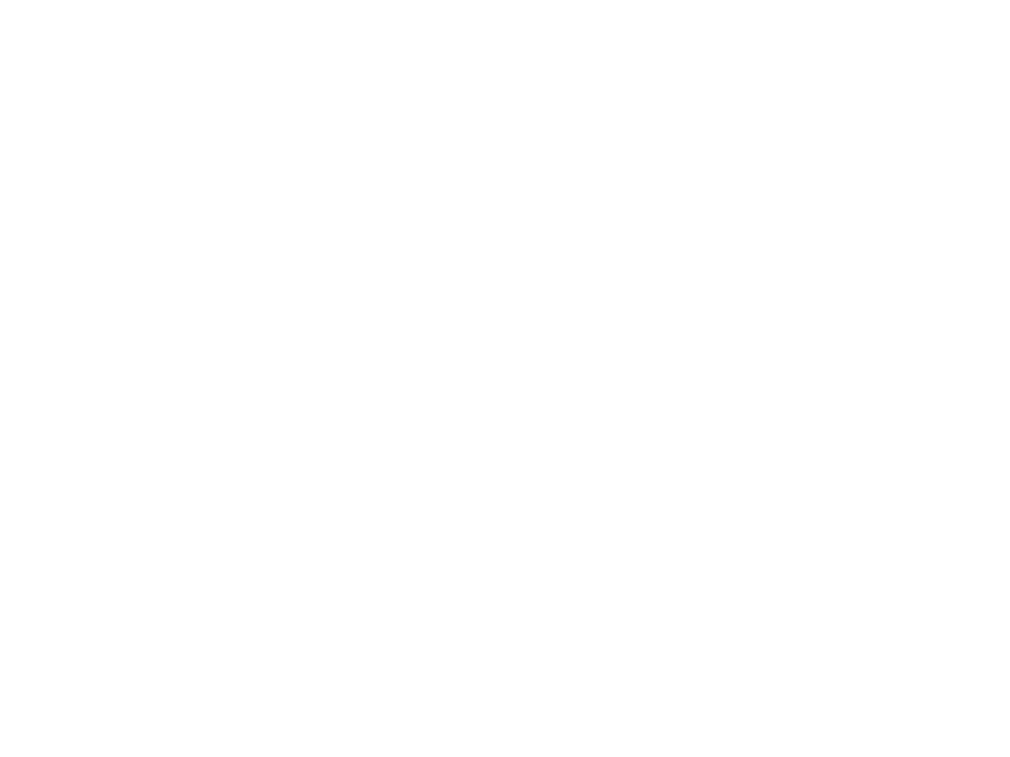

In [9]:
# calculate means and sems, and draw a chart
%matplotlib notebook
draw_chart(plt,calc_means(df_a, 'wk_bal'), calc_sems(df_a, 'wk_bal'))
print_label(plt,"Work Balance Ratings")

##   b)  Culture_value ratings

#####  i) final sample size (53980) after removal of 'none' (13546)
#####  ii) no data in 2008-2011

In [10]:
df_b=df2[df2['culture_val'] !='none'] # 13546 counts of 'none'
df_b['culture_val'] = pd.to_numeric(df_b['culture_val'], errors='coerce') # do not fill the NaN  with 0's

#df2[df2['culture_val'] =='none'].count()
#df_b['culture_val'].value_counts()
 #5.0    21536
 #4.0    13683
 #3.0     9192
 #1.0     4839
 #2.0     4730

C:\Users\ece.sohn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# count the samples by company
count_sample(df_b, 'culture_val')

company,amazon,apple,facebook,google,microsoft,netflix
year,,,,,,
2012,364,300,177,224,1006,37
2013,758,782,74,374,1496,53
2014,1281,1250,130,648,1987,59
2015,2823,1989,218,1133,2682,99
2016,3802,2280,238,1101,2478,80
2017,6373,2099,317,1193,2220,87
2018,7033,1673,300,1028,1646,87


<IPython.core.display.Javascript object>


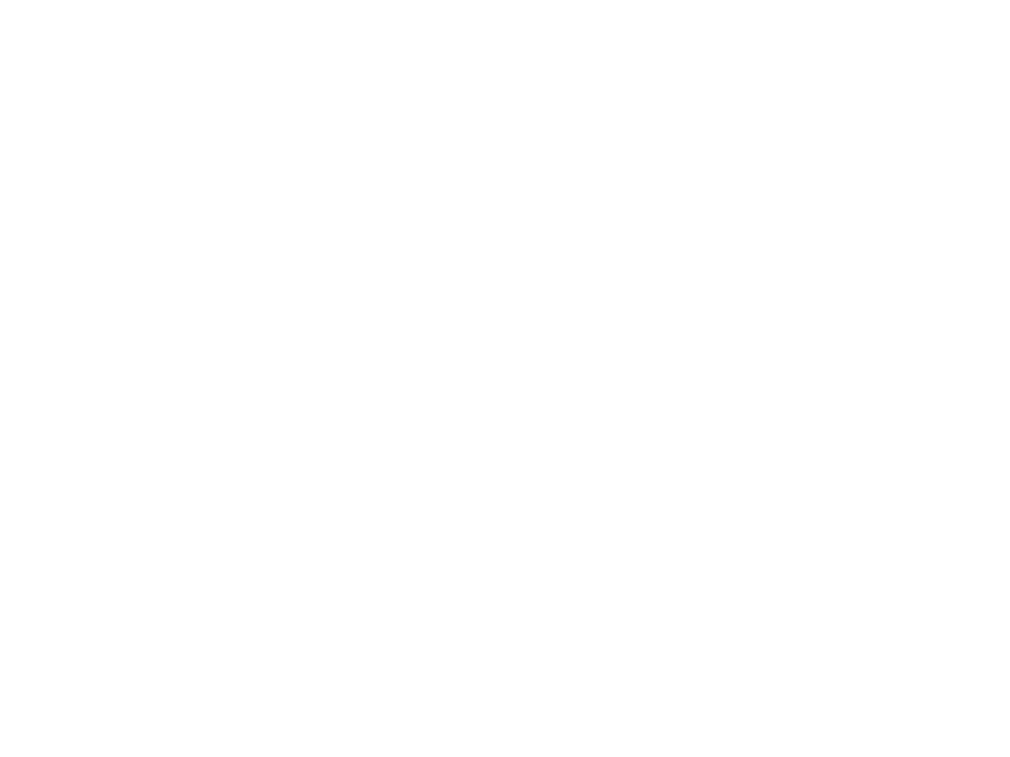

In [12]:
# calculate means and sems, and draw a chart
%matplotlib notebook
draw_chart2(plt,calc_means(df_b, 'culture_val'), calc_sems(df_b, 'culture_val'))
print_label(plt,"Culture Value Ratings")

##   c) Career-opportunity ratings

#####    final sample size (60418) after removal of 'none' (7108)

In [13]:
df_c=df2[df2['career_opp'] !='none'] # 7108 counts of 'none'
df_c['career_opp'] = pd.to_numeric(df_c['career_opp'], errors='coerce') # do not fill the NaN  with 0's


C:\Users\ece.sohn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
# count the samples by company
count_sample(df_c, 'career_opp')

company,amazon,apple,facebook,google,microsoft,netflix
year,,,,,,
2008,220,326,7,191,571,50
2009,168,202,8,134,329,88
2010,168,238,33,164,474,53
2011,255,381,24,198,812,40
2012,519,476,203,326,1455,56
2013,761,779,75,375,1496,53
2014,1288,1254,130,653,1994,60
2015,2841,1999,216,1141,2684,100
2016,3861,2292,236,1114,2492,80


<IPython.core.display.Javascript object>


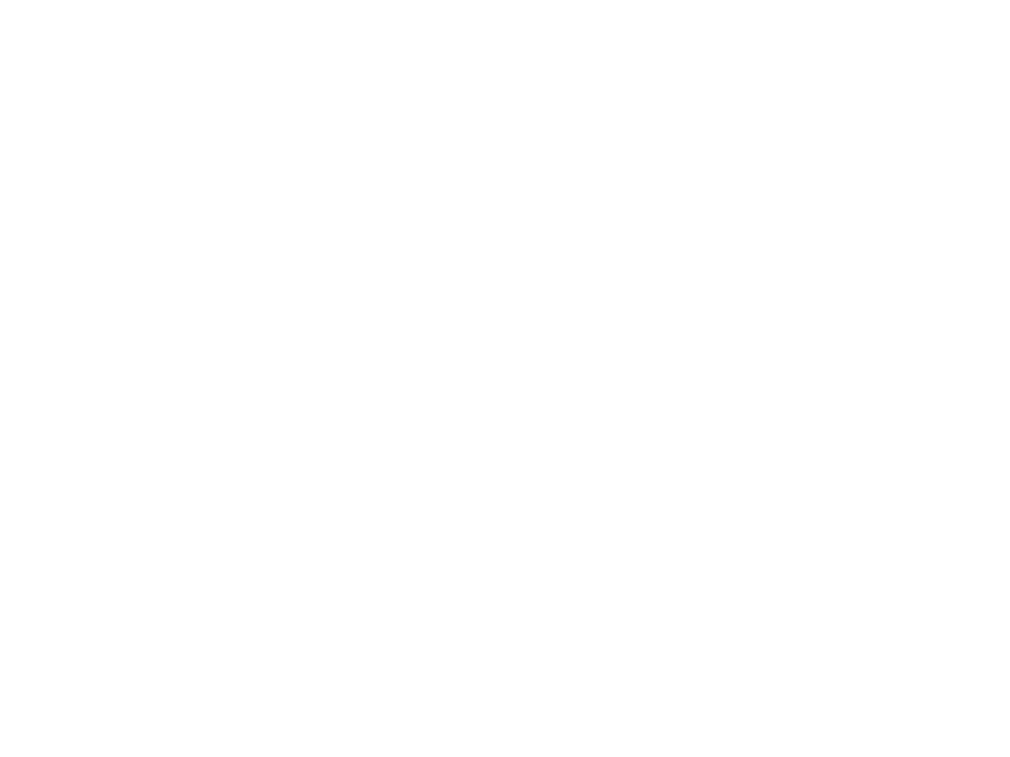

In [15]:
# calculate means and sems, and draw a chart
%matplotlib notebook
draw_chart(plt,calc_means(df_c, 'career_opp'), calc_sems(df_c, 'career_opp'))
print_label(plt,"Career Opportunity Ratings")

##  d) comp_benefit Ratings

##### final sample size (60365) after removal of 'none' (7161)

In [16]:
df_d=df2[df2['comp_benefit'] !='none'] #7161 counts of 'none'
df_d['comp_benefit'] = pd.to_numeric(df_d['comp_benefit'], errors='coerce') # do not fill the NaN  with 0's

C:\Users\ece.sohn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
# count the samples by company
count_sample(df_d, 'comp_benefit')

company,amazon,apple,facebook,google,microsoft,netflix
year,,,,,,
2008,220,326,7,191,571,50
2009,168,202,8,134,329,88
2010,168,238,33,164,474,53
2011,255,381,24,198,812,40
2012,521,467,203,322,1450,56
2013,762,782,75,376,1500,54
2014,1287,1253,130,651,1993,62
2015,2845,1997,216,1137,2692,99
2016,3851,2292,238,1108,2492,83


<IPython.core.display.Javascript object>


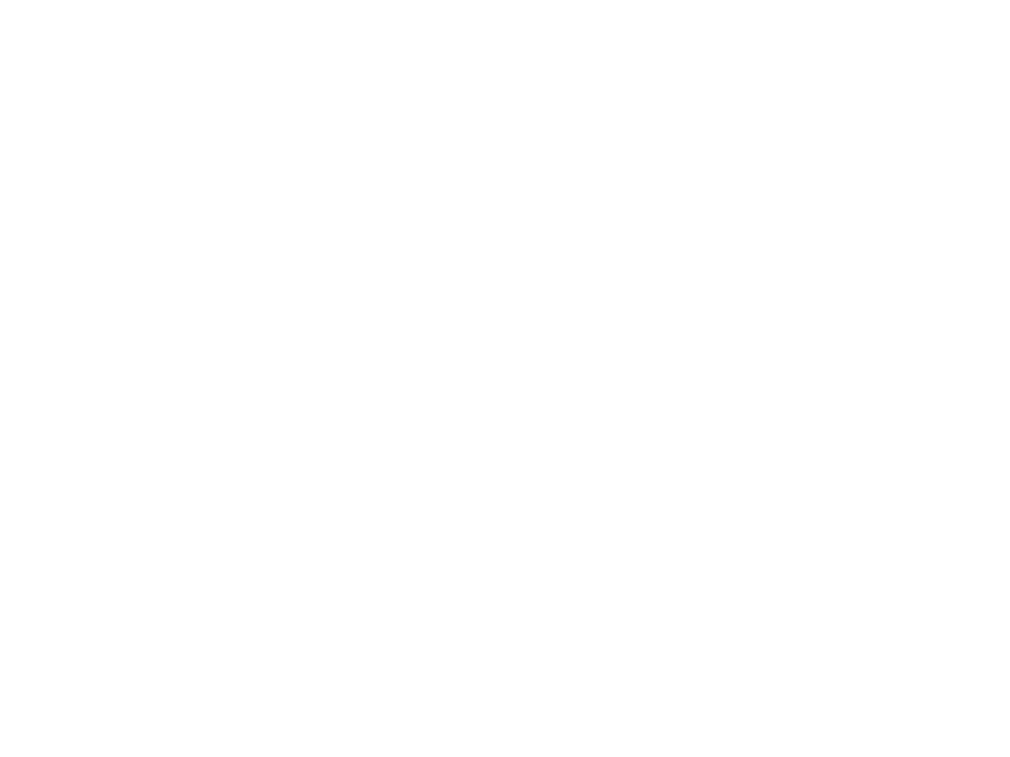

In [18]:
# calculate means and sems, and draw a chart
%matplotlib notebook
draw_chart(plt,calc_means(df_d, 'comp_benefit'), calc_sems(df_d, 'comp_benefit'))
print_label(plt,"Comp benefit Ratings")

##   e) Senior Management Ratings

##### final sample size (59751) after removal of 'none' (7775)

In [19]:
df_e=df2[df2['Sr_mgmt'] !='none'] # 7775 counts of 'none'
df_e['Sr_mgmt'] = pd.to_numeric(df_e['Sr_mgmt'], errors='coerce') # do not fill the NaN  with 0's

C:\Users\ece.sohn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# count the samples by company
count_sample(df_e, 'Sr_mgmt')

company,amazon,apple,facebook,google,microsoft,netflix
year,,,,,,
2008,220,326,7,191,571,50
2009,168,202,8,134,329,88
2010,168,238,33,164,474,53
2011,255,381,24,198,812,40
2012,520,466,202,324,1439,55
2013,757,781,74,376,1492,53
2014,1279,1244,130,648,1985,62
2015,2797,1976,217,1119,2672,99
2016,3764,2265,238,1085,2472,81


<IPython.core.display.Javascript object>


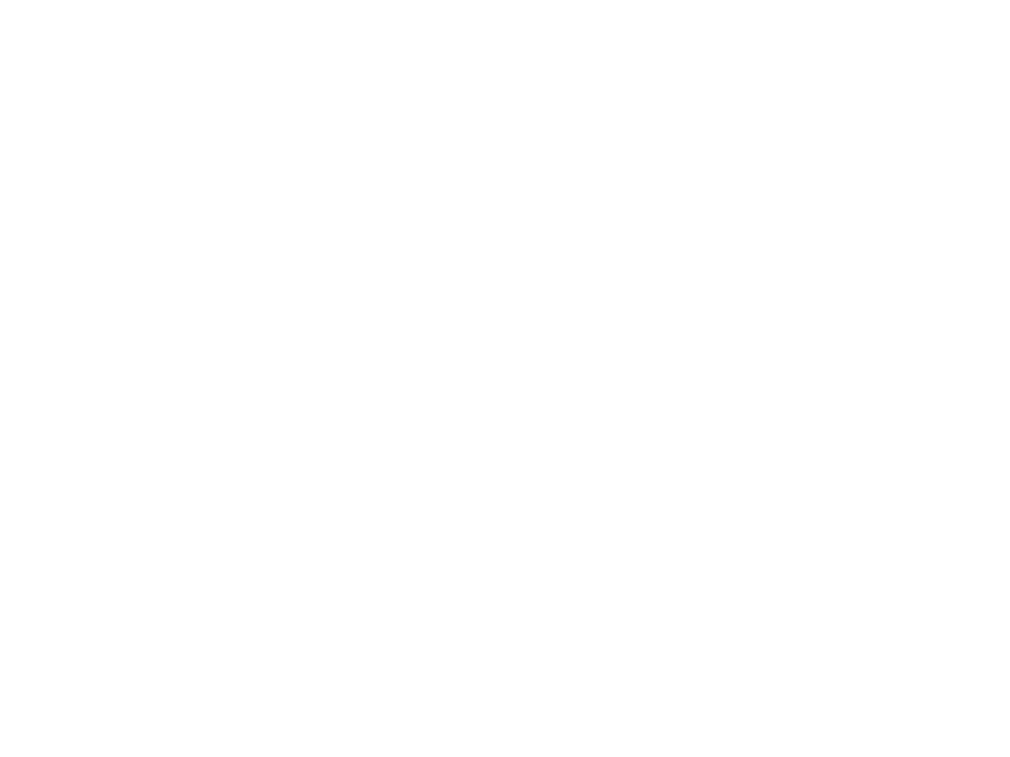

In [21]:
# calculate means and sems, and draw a chart
%matplotlib notebook
draw_chart(plt,calc_means(df_e, 'Sr_mgmt'), calc_sems(df_e, 'Sr_mgmt'))
print_label(plt,"Senior Management Ratings")

##   f) Overall Ratings

#####  final size (67526) -- originally float64 type with 0 'none' value-- no need to be converted to numeric form

In [22]:
#df2.dtypes
#df2['overall'].dtypes
#df2['overall'].value_counts()

In [23]:
# count the samples by company
df_f = df2
count_sample(df_f, 'overall')

company,amazon,apple,facebook,google,microsoft,netflix
year,,,,,,
2008,220,326,7,191,571,50
2009,168,202,8,134,329,88
2010,168,238,33,164,474,53
2011,255,381,24,198,812,40
2012,552,503,203,348,1545,59
2013,818,823,76,439,1646,57
2014,1405,1378,132,775,2187,64
2015,3200,2224,223,1378,3011,104
2016,4386,2562,250,1348,2852,92


<IPython.core.display.Javascript object>


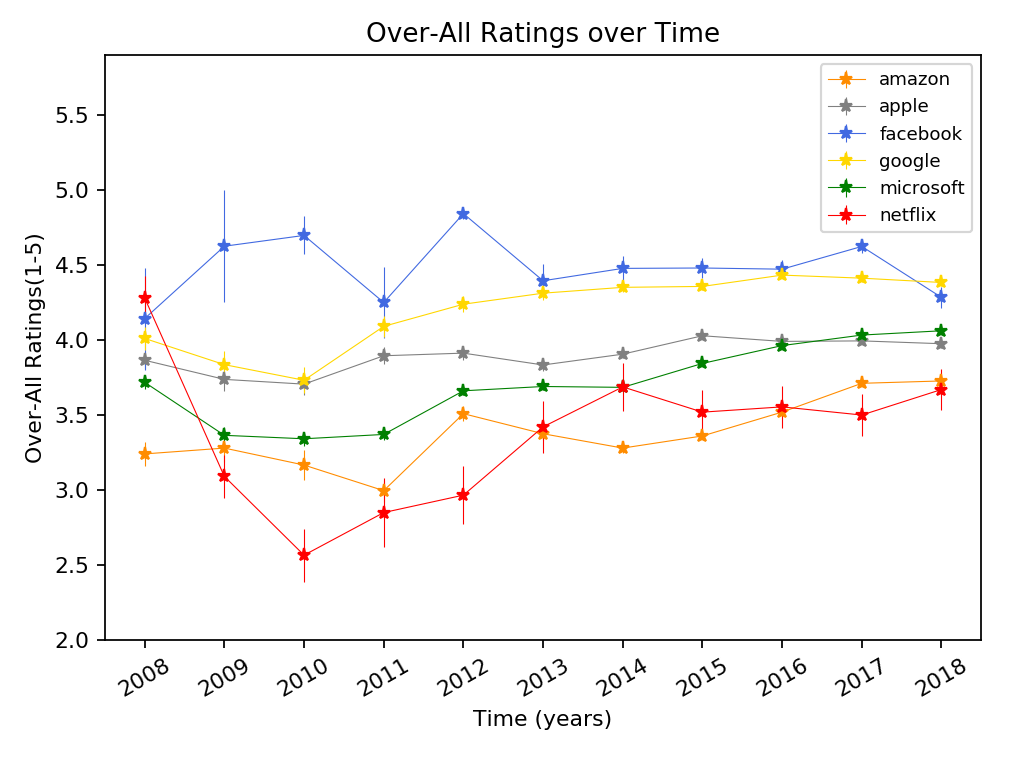

In [24]:
# calculate means and sems, and draw a chart
%matplotlib notebook
draw_chart(plt,calc_means(df_f, 'overall'), calc_sems(df_f, 'overall'))
print_label(plt,"Over-All Ratings")